In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sn
import pandas as pd
import math
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
r=input()
data = yf.download(r, start="2012-01-01", end="2017-08-01")
t=pd.DataFrame(data)
t.drop('Close',axis=1,inplace=True)
t=t[['Open','High','Low','Volume','Adj Close']]
t['OC_Change']=(t['Adj Close']-t['Open'])
t['HL_Change']=(t['High']-t['Low'])
#t=t[['Close','HL_Change','OC_Change','Volume']]
fc='Close'
fo=int(math.ceil(0.01*len(t)))
t.dropna(inplace=True)

t['target']=0
t.tail()

AAPL
[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Volume,Adj Close,OC_Change,HL_Change,target
Date,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,0
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,0
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,0


In [4]:
t.columns

Index(['Open', 'High', 'Low', 'Volume', 'Adj Close', 'OC_Change', 'HL_Change',
       'target'],
      dtype='object')

In [5]:
t.columns= ['Open', 'High', 'Low', 'Volume', 'AdjClose', 'OC_Change', 'HL_Change',
       'target']

In [6]:
t.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target
Date,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,0
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,0
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,0


In [7]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1403 entries, 2012-01-03 to 2017-07-31
Data columns (total 8 columns):
Open         1403 non-null float64
High         1403 non-null float64
Low          1403 non-null float64
Volume       1403 non-null int64
AdjClose     1403 non-null float64
OC_Change    1403 non-null float64
HL_Change    1403 non-null float64
target       1403 non-null int64
dtypes: float64(6), int64(2)
memory usage: 98.6 KB


In [8]:
t.isnull().any().sum()

0

In [9]:
t["gain"] = t.apply( lambda x: ( x.AdjClose - x.Open ) * 100 / x.Open, axis = 1 )

In [10]:
t.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain
Date,,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0,0.225655
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0,-0.319713
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,0,-2.457841
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,0,-0.650338
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,0,-1.168626


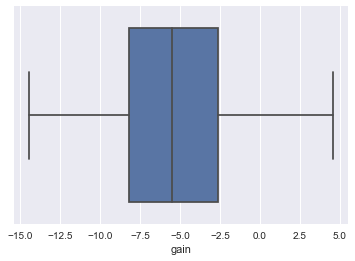

In [11]:
sn.boxplot(t.gain )

In [12]:
t.AdjClose.value_counts()

108.598877    2
124.144920    2
58.959965     2
118.525383    2
111.090431    2
142.509842    2
108.293594    2
121.252487    2
106.412552    2
112.701721    2
93.410141     2
114.396751    2
95.301994     2
95.137352     2
102.945305    2
94.233101     2
106.783058    2
79.204292     2
106.580978    2
113.774490    2
104.217972    1
96.611740     1
153.009140    1
71.038239     1
60.723431     1
74.049400     1
122.989487    1
100.968079    1
116.496429    1
123.380539    1
             ..
114.566376    1
106.850548    1
77.498940     1
117.877243    1
85.528366     1
58.271084     1
57.291889     1
66.386559     1
70.433861     1
72.584122     1
69.003082     1
56.095947     1
143.725586    1
92.463280     1
82.578003     1
77.869080     1
56.115402     1
75.586121     1
74.584061     1
148.148224    1
92.278694     1
111.611237    1
70.385323     1
109.161880    1
56.155945     1
97.089775     1
142.171692    1
149.662277    1
65.124519     1
111.122078    1
Name: AdjClose, Length: 

In [13]:
#t['target'][t['OC_Change']>0]=1
#t.drop(['HL_Change','OC_Change'],axis=1,inplace=True)
#for i in range(0,len(t)-1):
#    t['target'][i+1]=t['Close'][i+1]-t['Close'][i]

t['target']=t.AdjClose.diff()
t['target'][0]=0
t['targ']=0
t['targ'][t['target']>0]=1
t
#t.drop(['HL_Change','target'],axis=1,inplace=True)
t.tail()


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ
Date,,,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0.647477,0.225655,1
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0.717178,-0.319713,1
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,-2.888657,-2.457841,0
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,-1.055862,-0.650338,0
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,-0.766983,-1.168626,0


/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


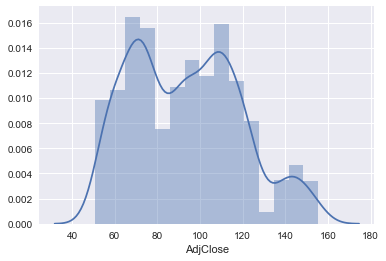

In [14]:
sn.distplot( t.AdjClose )

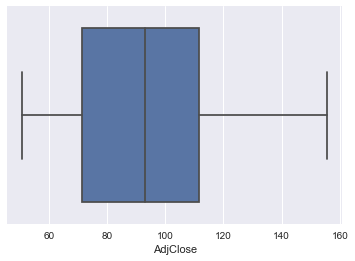

In [15]:
sn.boxplot(t.AdjClose )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


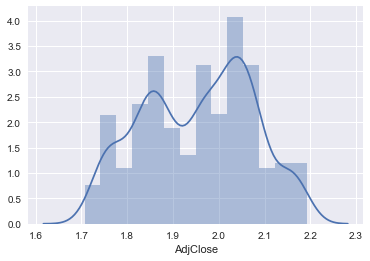

In [16]:
sn.distplot(np.log10(t.AdjClose ) )

In [17]:
t['log_close'] = np.log10(t.AdjClose )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


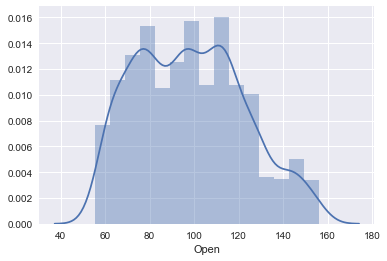

In [18]:
sn.distplot( t.Open )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


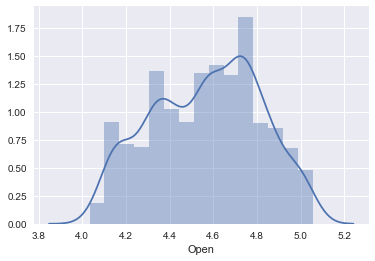

In [19]:
sn.distplot( np.log1p( t.Open ) )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


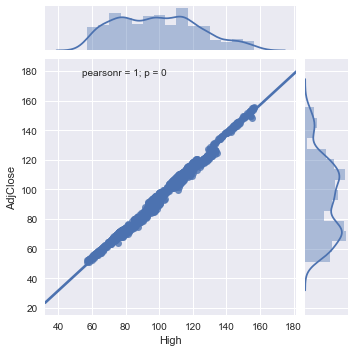

In [20]:
sn.jointplot(x="High", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


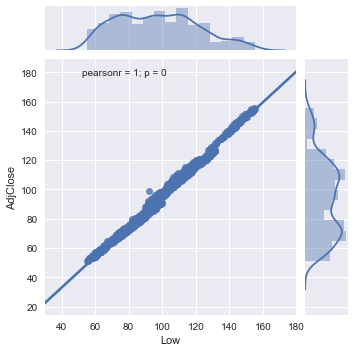

In [21]:
sn.jointplot(x="Low", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


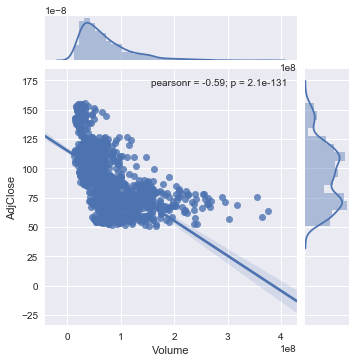

In [22]:
sn.jointplot(x="Volume", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


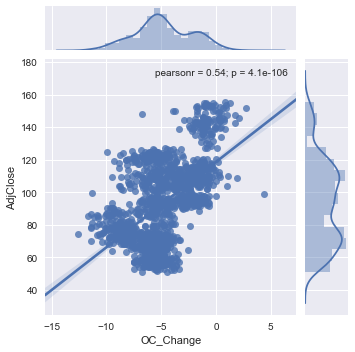

In [23]:
sn.jointplot(x="OC_Change", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


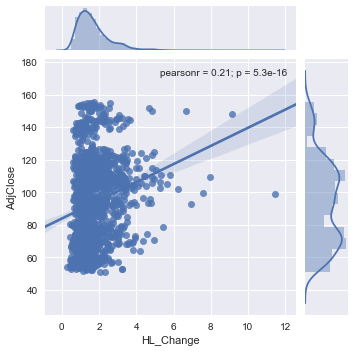

In [24]:
sn.jointplot(x="HL_Change", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


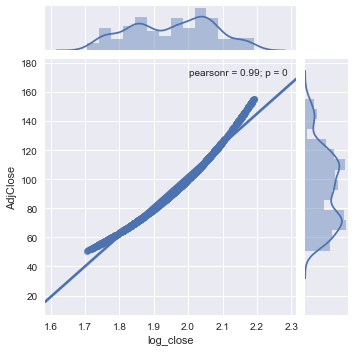

In [25]:
sn.jointplot(x="log_close", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


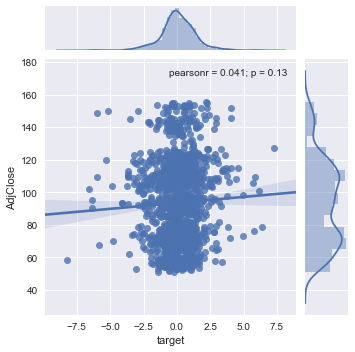

In [26]:
sn.jointplot(x="target", y="AdjClose", data=t, kind = 'reg', size = 5)

In [27]:

vars1=['Open', 'High', 'Low', 'Volume', 'AdjClose', 'OC_Change', 'HL_Change', 'log_close','target','gain']

/Users/apple/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


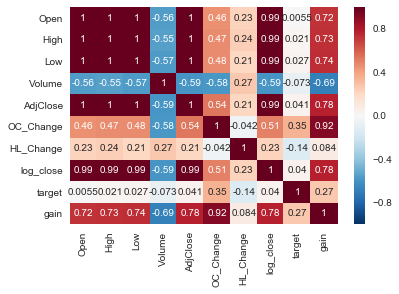

In [28]:
sn.heatmap( t[vars1].corr(), annot=True )

In [29]:
from scipy import stats

In [30]:
r, p = stats.pointbiserialr( t['Volume'],
                           t['AdjClose'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

point biserial correlation r is -0.588306490009 with p = 2.09914778552e-131


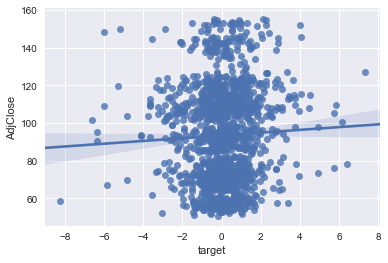

In [31]:
sn.regplot( t.target , t.AdjClose )

In [32]:
sn.set(font_scale=1.2,style="whitegrid") #set styling preferences

pc = t.sample(frac = .25) #read the dataset and sample 25% of it

In [33]:
x= t.replace([np.inf, -np.inf], np.nan) #convert infs to nans
x = t.dropna(axis = 1, how = 'any') #remove nans
x = t._get_numeric_data() #keep only numeric features
x.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0.647477,0.225655,1,2.182251
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0.717178,-0.319713,1,2.184293
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,-2.888657,-2.457841,0,2.176007
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,-1.055862,-0.650338,0,2.172939
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,-0.766983,-1.168626,0,2.170696


In [34]:
xi = t.values #convert the data into a numpy array
xi = scale(x);
x.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,2.039993,0.647477,0.225655,1,2.182251
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,0.869995,0.717178,-0.319713,1,2.184293
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,6.690002,-2.888657,-2.457841,0,2.176007
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,1.039994,-1.055862,-0.650338,0,2.172939
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,2.199997,-0.766983,-1.168626,0,2.170696


In [35]:
t.targ.value_counts()

1    726
0    677
Name: targ, dtype: int64

In [36]:
app_df = pd.DataFrame(t.targ.value_counts() )

In [37]:
app_df

,targ
1,726
0,677


In [38]:
app_df['nam_df'] = app_df.index
app_df

,targ,nam_df
1,726,1
0,677,0


/Users/apple/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


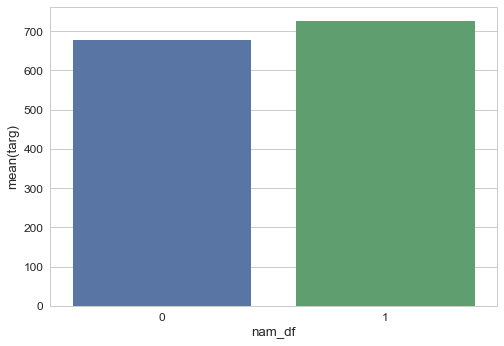

In [39]:
sn.barplot(  x = 'nam_df', y = 'targ', data = app_df  )

In [40]:
covar_matrix = PCA(n_components = 9) #we have 20 features

In [41]:
covar_matrix.fit(xi)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 58.6,  77.2,  88. ,  94.4,  97.2,  99.7, 100. , 100. , 100. ])

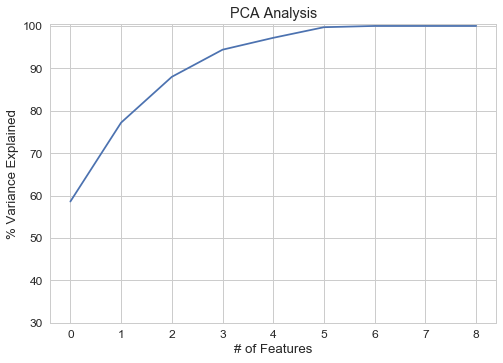

In [42]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


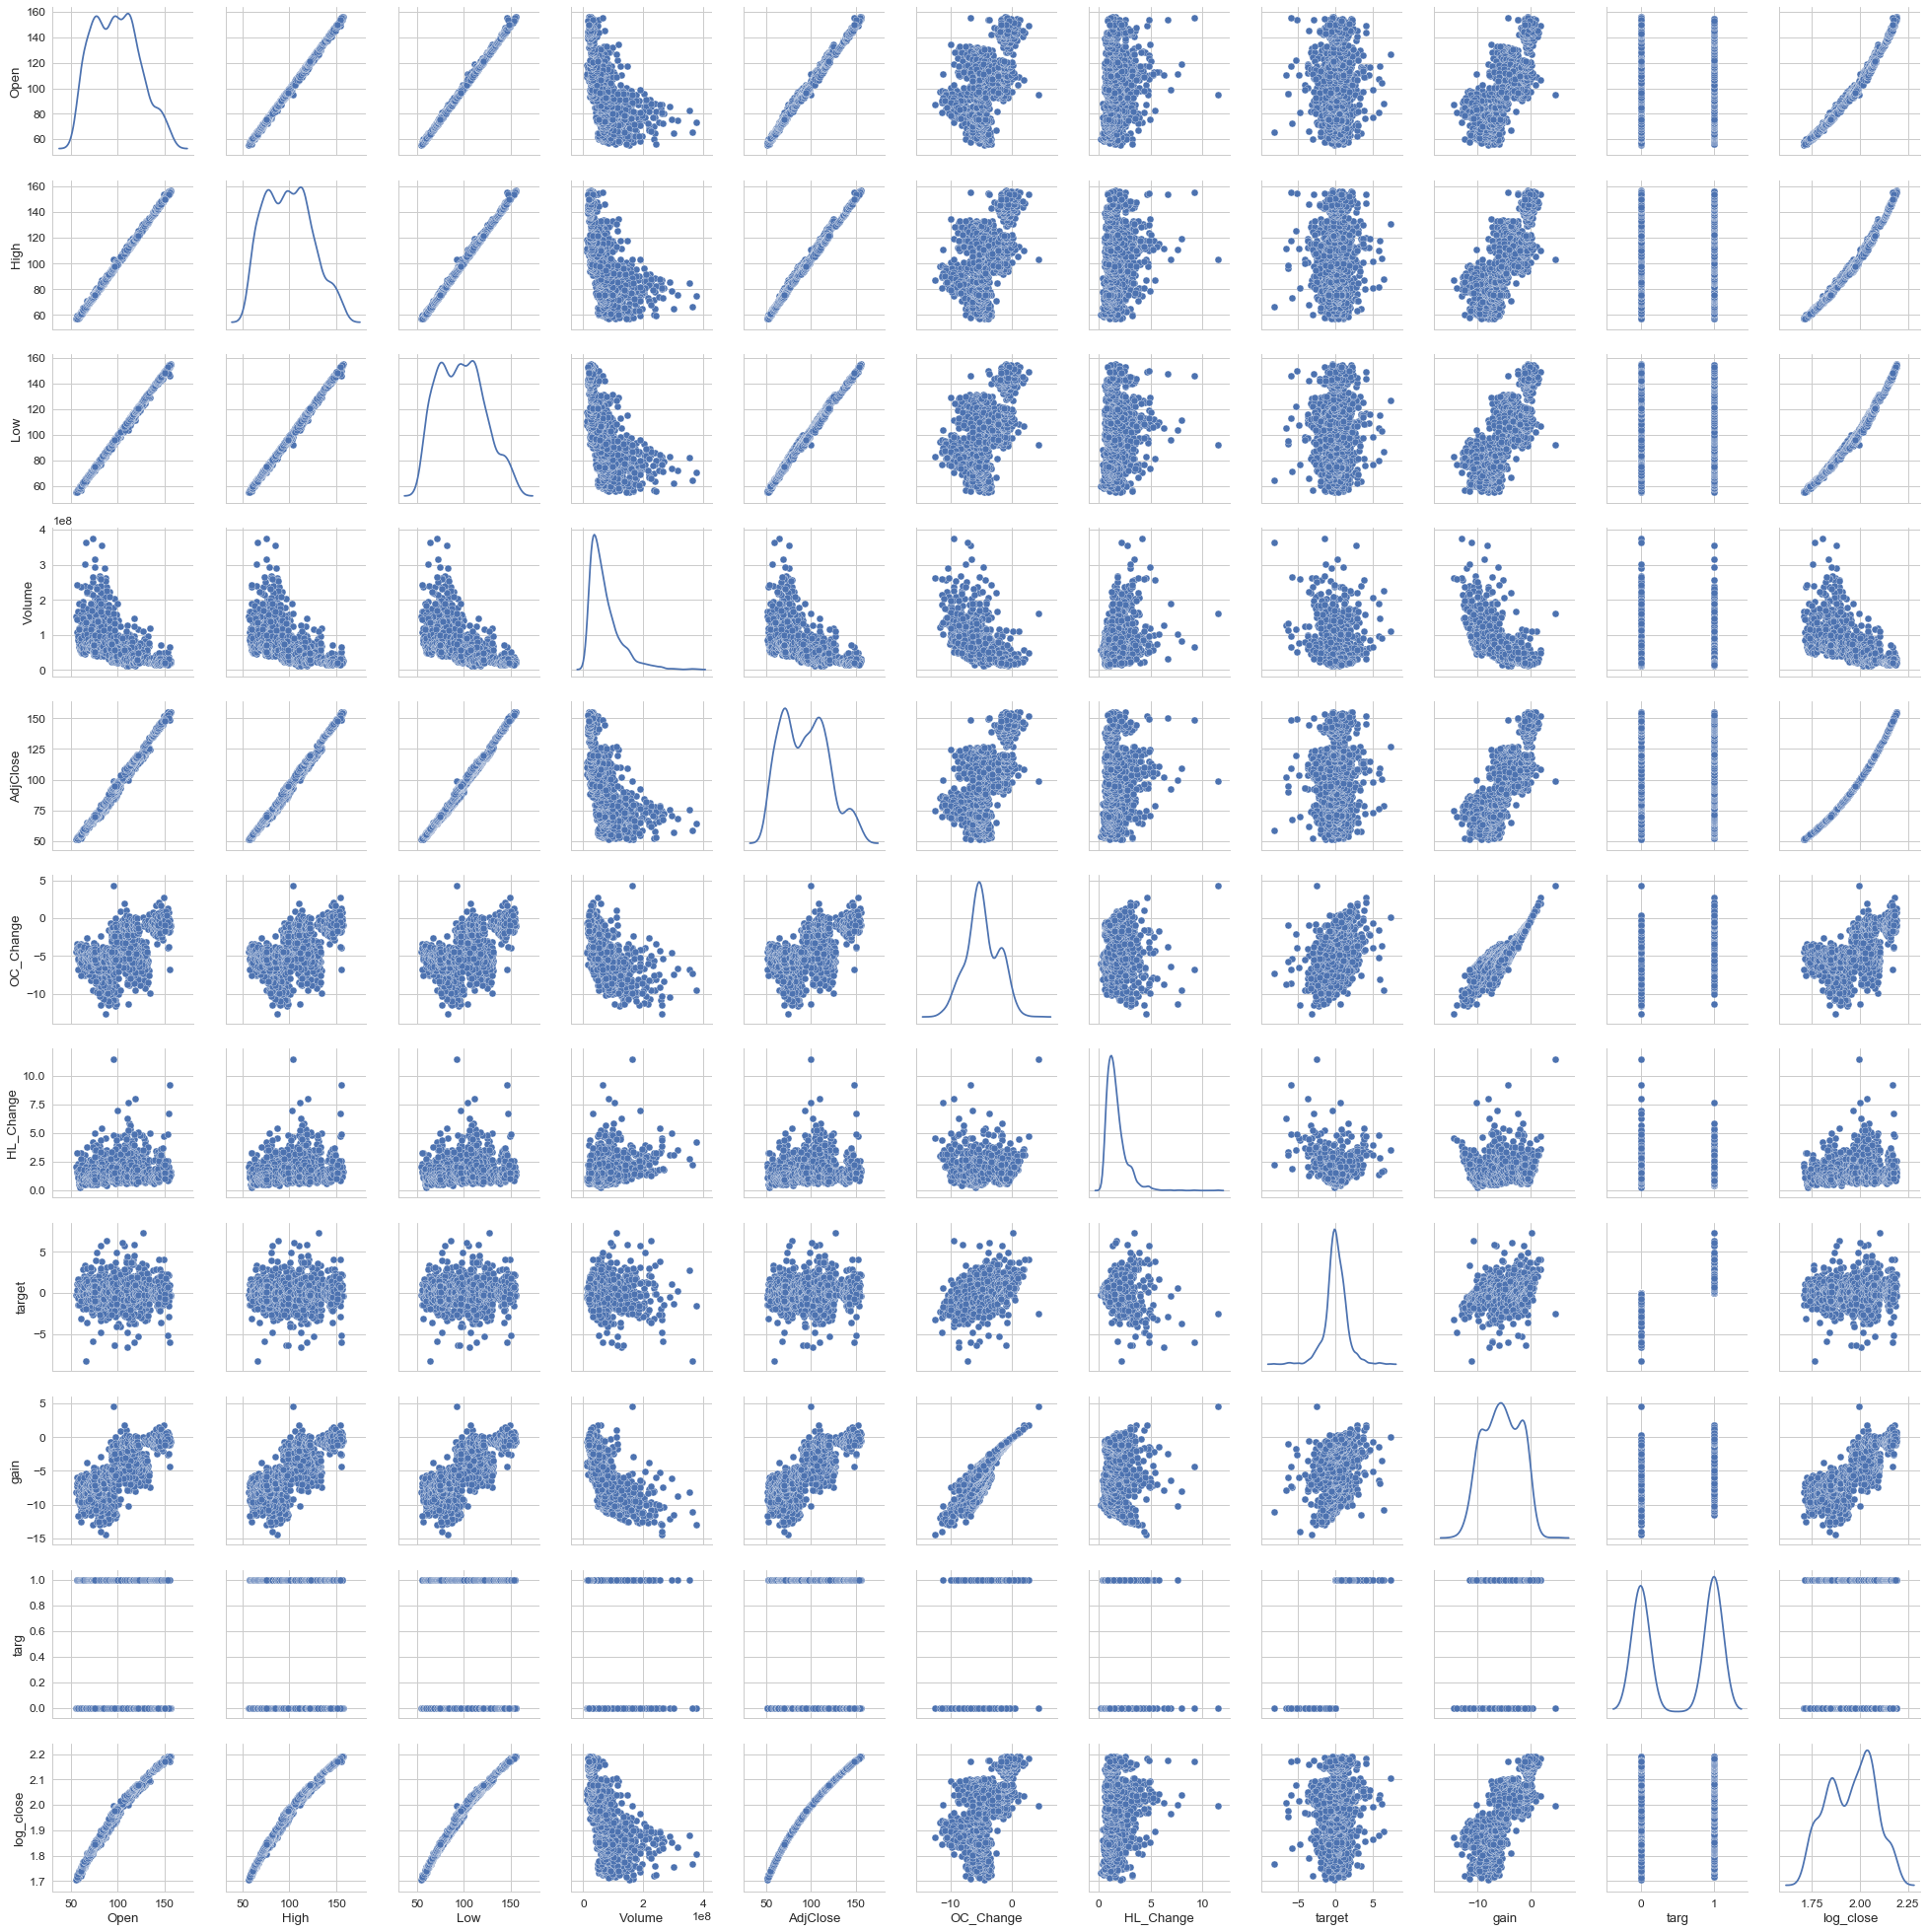

In [43]:
plot = sn.pairplot(x,diag_kind='kde')

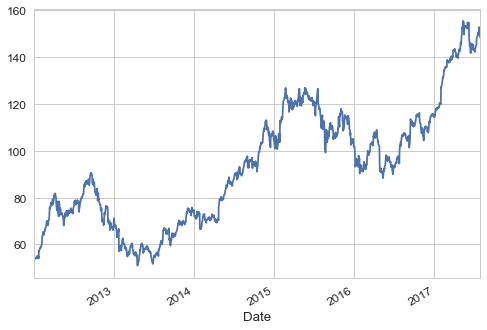

In [44]:
import matplotlib.pyplot as plt

t['AdjClose'].plot(grid=True)

plt.show()

In [45]:
import numpy as np

daily_close = t[['AdjClose']]

# Daily returns
daily_pct_change = daily_close.pct_change()

daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.tail())



            AdjClose
Date                
2017-07-25  0.004274
2017-07-26  0.004714
2017-07-27 -0.018897
2017-07-28 -0.007040
2017-07-31 -0.005150


In [46]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns


daily_log_returns['AdjClose'][0]=0
print(daily_log_returns.tail())

            AdjClose
Date                
2017-07-25  0.004265
2017-07-26  0.004703
2017-07-27 -0.019078
2017-07-28 -0.007065
2017-07-31 -0.005164


In [47]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change.tail())

            AdjClose
Date                
2017-07-25  0.004274
2017-07-26  0.004714
2017-07-27 -0.018897
2017-07-28 -0.007040
2017-07-31 -0.005150


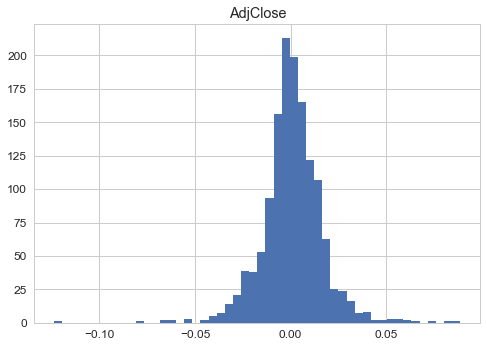

          AdjClose
count  1402.000000
mean      0.000862
std       0.015921
min      -0.123558
25%      -0.006723
50%       0.000521
75%       0.009331
max       0.088741


In [48]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of 'daily_pct_c'
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [49]:
import pandas_datareader as pdr
import datetime
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2012, 1, 1), datetime.datetime(2017, 8, 1))



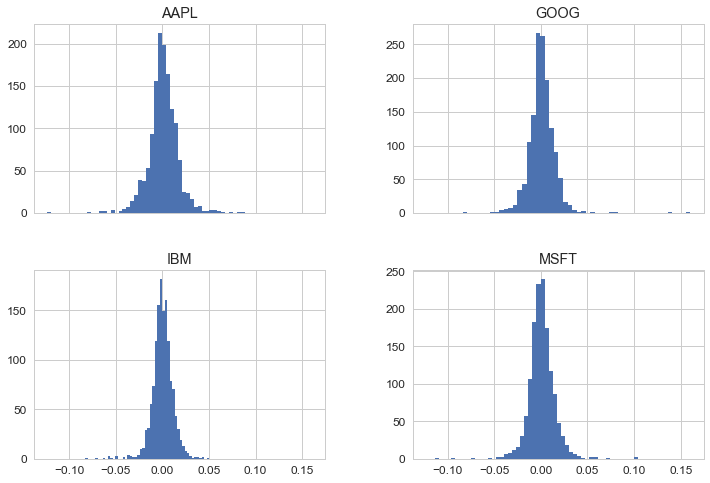

In [50]:
import matplotlib.pyplot as plt 

daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for 'daily_close_px'
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [51]:
daily_pct_change.tail()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-07-26,0.004714,-0.003050,-0.005678,-0.001887
2017-07-27,-0.018897,-0.014465,-0.001995,-0.012019
2017-07-28,-0.007040,0.007965,-0.005377,-0.001640
2017-07-31,-0.005150,-0.011715,0.002634,-0.004655
2017-08-01,0.008875,0.000355,0.004355,-0.001650


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


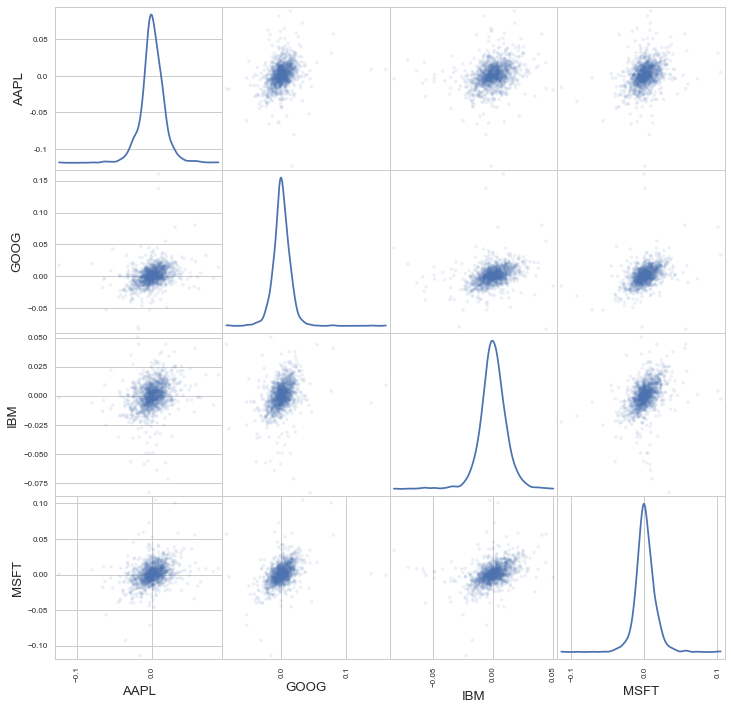

In [52]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [53]:
t.head()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,52.852215,-5.633499,0.500000,0.000000,-9.632265,0,1.723063
2012-01-04,58.571430,59.240002,58.468571,65005500,53.136253,-5.435177,0.771431,0.284038,-9.279570,1,1.725391
2012-01-05,59.278572,59.792858,58.952858,67817400,53.726177,-5.552395,0.840000,0.589924,-9.366614,1,1.730186
2012-01-06,59.967144,60.392857,59.888573,79573200,54.287819,-5.679325,0.504284,0.561642,-9.470728,1,1.734702
2012-01-09,60.785713,61.107143,60.192856,98506100,54.201706,-6.584007,0.914287,-0.086113,-10.831504,0,1.734013


In [54]:
t.drop(['HL_Change','target'],axis=1,inplace=True)

In [55]:
t.head()

,Open,High,Low,Volume,AdjClose,OC_Change,gain,targ,log_close
Date,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,75555200,52.852215,-5.633499,-9.632265,0,1.723063
2012-01-04,58.571430,59.240002,58.468571,65005500,53.136253,-5.435177,-9.279570,1,1.725391
2012-01-05,59.278572,59.792858,58.952858,67817400,53.726177,-5.552395,-9.366614,1,1.730186
2012-01-06,59.967144,60.392857,59.888573,79573200,54.287819,-5.679325,-9.470728,1,1.734702
2012-01-09,60.785713,61.107143,60.192856,98506100,54.201706,-6.584007,-10.831504,0,1.734013


In [56]:
t.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,gain,targ,log_close
Date,,,,,,,,,
2017-07-25,151.800003,153.839996,151.800003,18853900,152.142548,0.342545,0.225655,1,2.182251
2017-07-26,153.350006,153.929993,153.059998,15781000,152.859726,-0.490280,-0.319713,1,2.184293
2017-07-27,153.750000,153.990005,147.300003,32476300,149.971069,-3.778931,-2.457841,0,2.176007
2017-07-28,149.889999,150.229996,149.190002,17213700,148.915207,-0.974792,-0.650338,0,2.172939
2017-07-31,149.899994,150.330002,148.130005,19845900,148.148224,-1.751770,-1.168626,0,2.170696


In [58]:
X = t.iloc[:,0:7].values
y = t.iloc[:, 7].values
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cl=SVC(kernel='poly',random_state=0) 
cl.fit(X_train, y_train)

# Predicting the Test set results
y_pred = cl.predict(X_test)
pp=cl.score(X_train,y_train)
print(pp*100)


51.6042780749


In [59]:
l_svm_cm = metrics.confusion_matrix( y_test, y_pred )
l_svm_cm

NameError: name 'metrics' is not defined

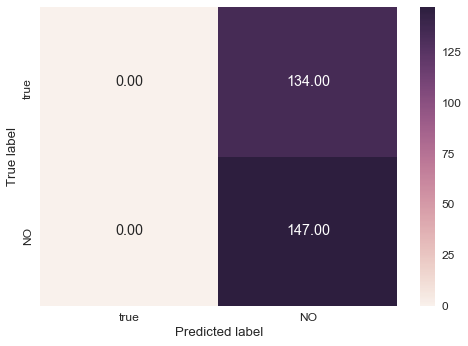

In [67]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

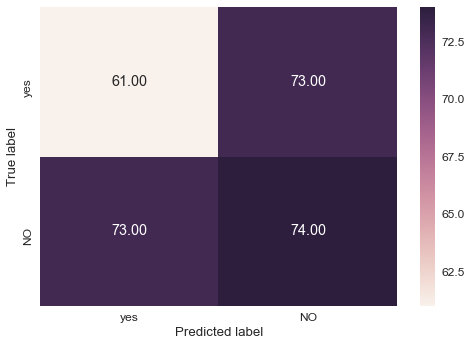

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( n_neighbors = 5 )
knn_clf.fit( X_train,y_train )
knn_cm = metrics.confusion_matrix( y_test, knn_clf.predict( X_test ) )
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["yes", "NO"] , yticklabels = ["yes", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [71]:
metrics.accuracy_score( y_test, knn_clf.predict( X_test ) )

0.4804270462633452

TypeError: 'property' object is not subscriptable

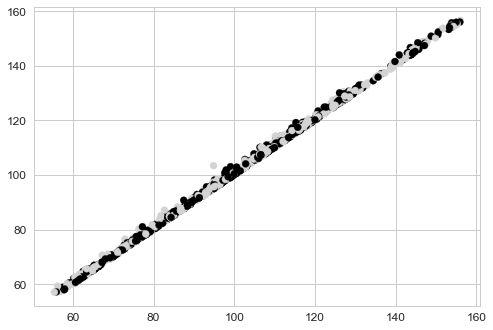

In [68]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = SVC.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [72]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
    

/Users/apple/anaconda/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


0.998581560284


In [75]:
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( X_train,y_train )
    print( "Tree Depth: ",
          depth,
          " - Accuracy: ",
          metrics.accuracy_score( y_test, clf_tree.predict( X_test ) ) )


Tree Depth:  2  - Accuracy:  1.0
Tree Depth:  3  - Accuracy:  1.0
Tree Depth:  4  - Accuracy:  1.0
Tree Depth:  5  - Accuracy:  1.0
Tree Depth:  6  - Accuracy:  1.0


In [74]:
model

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [76]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.998581560284


In [77]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.998581560284


In [78]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.998581560284


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.801818642351


In [80]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
r=t
model.summary()

/Users/apple/anaconda/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     481.4
Date:                Mon, 02 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:28:38   Log-Likelihood:                -440.07
No. Observations:                1122   AIC:                             894.1
Df Residuals:                    1115   BIC:                             929.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0878      0.014     -6.126      0.000      -0.116      -0.060
x2             0.0637      0.012      5.186      0.000       0.040       0.088
x3             0.0555      0.012      4.745      0.000       0.033       0.078
x4          2.743e-10    3.6e-10      0.763      0.446   -4.31e-10     9.8e-10
x5            -0.0274      0.009     -2.881      0.004      -0.046      -0.009
x6             0.0604      0.010      6.206      0.000       0.041       0.080
x7             0.0082      0.009      0.905      0.366      -0.010       0.026
x8             0.2153      0.010     21.477      0.000       0.196       0.235
x9            -0.0417      0.011     -3.811      0.000      -0.063      -0.020
==============================================================================
Omnibus:                      226.233   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.608
Skew:                           0.013   Prob(JB):                     1.25e-10
Kurtosis:                       2.013   Cond. No.                     4.06e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
t_x = t.drop(["targ","target"], axis = 1)
vif["vif factor"] = [variance_inflation_factor(r.values, i) for i in range(t_x.shape[1])]

vif["features"] = t_x.columns

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [82]:
vif

,vif factor,features
0,inf,Open
1,inf,High
2,inf,Low
3,8.912817e+00,Volume
4,inf,AdjClose
5,inf,OC_Change
6,9.007199e+15,HL_Change
7,2.507554e+00,gain
8,9.551425e+01,log_close


In [12]:
t.keys()

Index(['Open', 'High', 'Low', 'Volume', 'Close', 'OC_Change', 'targ'], dtype='object')

In [54]:
y = t['targ']
X = t.drop(['targ'],axis=1)


In [1]:
X.head()


NameError: name 'X' is not defined

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))

In [60]:
mlp.fit(X_train,y_train)

/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [67]:
predictions = mlp.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0,

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[133  41]
 [ 20 157]]


In [63]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.76      0.81       174
          1       0.79      0.89      0.84       177

avg / total       0.83      0.83      0.83       351



In [64]:
len(mlp.coefs_)
len(mlp.intercepts_[0])

5

In [65]:
len(mlp.coefs_)

4

In [66]:
print(mlp.coefs_)

[array([[ 0.20564588,  0.24362405, -0.59664579,  0.95079427, -0.53254926],
       [ 0.56200631, -0.43544498,  0.53323525, -0.51150851,  0.50730108],
       [ 0.33157703,  0.43932043, -0.03434002,  0.59784285,  0.17933462],
       [-0.73463663, -0.09703742, -0.01427657,  0.61356435,  0.01354335],
       [-0.00170765,  0.35898325, -0.01504887,  0.86405247,  0.14510168],
       [-0.00105533,  0.84748409, -1.02238815, -0.2044189 ,  0.34533431]]), array([[  1.14861411e-25,   6.39087460e-02,  -7.98927230e-01,
          2.66871798e-01,   5.17239386e-01],
       [  8.33403471e-04,   1.32021100e-01,   2.04224938e-01,
         -2.36957882e-01,  -9.20275998e-01],
       [ -2.68206090e-08,   9.87305841e-01,  -3.70067462e-01,
         -4.01292778e-01,   6.12360850e-01],
       [ -1.02490884e-03,  -8.34322368e-02,  -7.44950353e-01,
         -7.15231875e-01,  -1.36414483e-01],
       [ -1.27002320e-01,  -2.07278931e-01,   4.06167482e-02,
          3.36012961e-01,  -1.09486759e-01]]), array([[ -1.1524